<a href="https://colab.research.google.com/github/ShahzebMalik32/heart-disease-risk-assessment-model/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv("/content/raw data.csv")
# Remove last 210,000 rows if applicable
df = df.iloc[:-210000]
df

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0               No  16.60     Yes              No     No             3.0   
1               No  20.34      No              No    Yes             0.0   
2               No  26.58     Yes              No     No            20.0   
3               No  24.21      No              No     No             0.0   
4               No  23.71      No              No     No            28.0   
...            ...    ...     ...             ...    ...             ...   
29626           No  27.89      No              No     No             0.0   
29627           No  27.44      No              No     No             0.0   
29628           No  26.58      No              No     No             7.0   
29629           No  25.40      No              No     No             2.0   
29630           No  22.67      No              No     No             0.0   

       MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0              30.0          No  Female        55-59     White      Yes   
1               0.0          No  Female  80 or older     White       No   
2              30.0          No    Male        65-69     White      Yes   
3               0.0          No  Female        75-79     White       No   
4               0.0         Yes  Female        40-44     White       No   
...             ...         ...     ...          ...       ...      ...   
29626           0.0          No    Male        55-59     White       No   
29627           0.0          No  Female        70-74     White       No   
29628           0.0          No    Male        70-74     White       No   
29629           1.0          No    Male        50-54  Hispanic       No   
29630           4.0          No  Female        45-49     White       No   

      PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                  Yes  Very good        5.0    Yes            No        Yes  
1                  Yes  Very good        7.0     No            No         No  
2                  Yes       Fair        8.0    Yes            No         No  
3                   No       Good        6.0     No            No        Yes  
4                  Yes  Very good        8.0     No            No         No  
...                ...        ...        ...    ...           ...        ...  
29626              Yes  Excellent        7.0     No            No         No  
29627              Yes       Good        7.0     No            No         No  
29628              Yes  Very good        8.0     No            No        Yes  
29629              Yes  Very good        7.0     No            No         No  
29630              Yes  Very good        8.0     No            No         No  

[29631 rows x 18 columns]

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29631 entries, 0 to 29630
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      29631 non-null  object 
 1   BMI               29631 non-null  float64
 2   Smoking           29631 non-null  object 
 3   AlcoholDrinking   29631 non-null  object 
 4   Stroke            29631 non-null  object 
 5   PhysicalHealth    29631 non-null  float64
 6   MentalHealth      29631 non-null  float64
 7   DiffWalking       29631 non-null  object 
 8   Sex               29631 non-null  object 
 9   AgeCategory       29631 non-null  object 
 10  Race              29631 non-null  object 
 11  Diabetic          29631 non-null  object 
 12  PhysicalActivity  29631 non-null  object 
 13  GenHealth         29631 non-null  object 
 14  SleepTime         29631 non-null  float64
 15  Asthma            29631 non-null  object 
 16  KidneyDisease     29631 non-null  object

In [ ]:
df.describe()


BMI  PhysicalHealth  MentalHealth     SleepTime
count  29631.000000    29631.000000  29631.000000  29631.000000
mean      28.071515        3.671121      3.979683      7.138369
std        6.293284        8.229430      7.940034      1.480811
min       12.400000        0.000000      0.000000      1.000000
25%       23.730000        0.000000      0.000000      6.000000
50%       27.120000        0.000000      0.000000      7.000000
75%       31.190000        2.000000      4.000000      8.000000
max       83.000000       30.000000     30.000000     24.000000

In [ ]:
# Handling missing values
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
    elif pd.api.types.is_object_dtype(df[column]):
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)

print("Missing values count per column after filling:")
print(df.isnull().sum())

<ipython-input-4-4ea49bf1d10b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)
<ipython-input-4-4ea49bf1d10b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

Missing values count per column after filling:
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [ ]:
# Remove duplicates
df = df.drop_duplicates()
print("Shape of the DataFrame after dropping duplicates:")
print(df.shape)


Shape of the DataFrame after dropping duplicates:
(29458, 18)


In [ ]:
df

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0               No  16.60     Yes              No     No             3.0   
1               No  20.34      No              No    Yes             0.0   
2               No  26.58     Yes              No     No            20.0   
3               No  24.21      No              No     No             0.0   
4               No  23.71      No              No     No            28.0   
...            ...    ...     ...             ...    ...             ...   
29626           No  27.89      No              No     No             0.0   
29627           No  27.44      No              No     No             0.0   
29628           No  26.58      No              No     No             7.0   
29629           No  25.40      No              No     No             2.0   
29630           No  22.67      No              No     No             0.0   

       MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0              30.0          No  Female        55-59     White      Yes   
1               0.0          No  Female  80 or older     White       No   
2              30.0          No    Male        65-69     White      Yes   
3               0.0          No  Female        75-79     White       No   
4               0.0         Yes  Female        40-44     White       No   
...             ...         ...     ...          ...       ...      ...   
29626           0.0          No    Male        55-59     White       No   
29627           0.0          No  Female        70-74     White       No   
29628           0.0          No    Male        70-74     White       No   
29629           1.0          No    Male        50-54  Hispanic       No   
29630           4.0          No  Female        45-49     White       No   

      PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                  Yes  Very good        5.0    Yes            No        Yes  
1                  Yes  Very good        7.0     No            No         No  
2                  Yes       Fair        8.0    Yes            No         No  
3                   No       Good        6.0     No            No        Yes  
4                  Yes  Very good        8.0     No            No         No  
...                ...        ...        ...    ...           ...        ...  
29626              Yes  Excellent        7.0     No            No         No  
29627              Yes       Good        7.0     No            No         No  
29628              Yes  Very good        8.0     No            No        Yes  
29629              Yes  Very good        7.0     No            No         No  
29630              Yes  Very good        8.0     No            No         No  

[29458 rows x 18 columns]

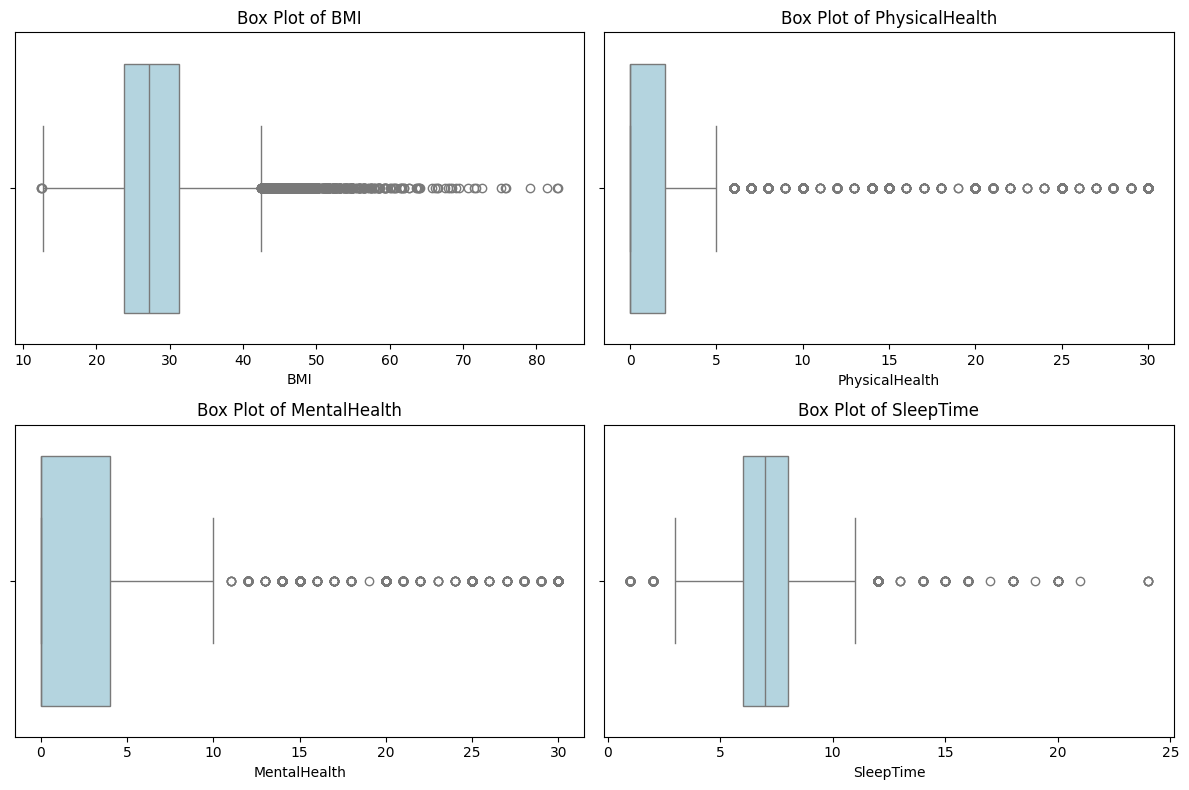

In [ ]:
# univariate
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns for which to detect outliers
numerical_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

# Plot box plots for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=col ,color='lightblue')
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


In [ ]:
# Outliers handling (cap outliers to 3 standard deviations)
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        z_scores = stats.zscore(df[column])
        abs_z_scores = np.abs(z_scores)
        outliers = (abs_z_scores > 3)
        df.loc[outliers, column] = np.sign(z_scores[outliers]) * 3 * df[column].std() + df[column].mean()

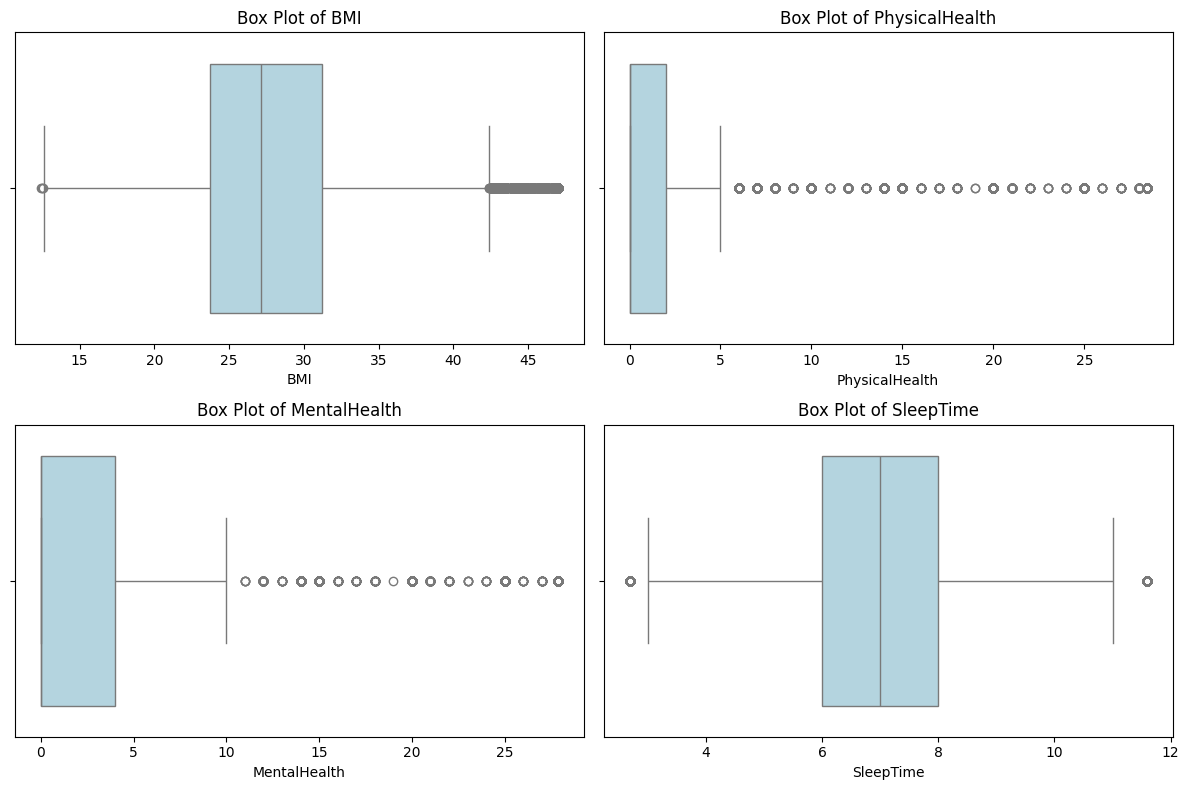

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns for which to detect outliers
numerical_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

# Plot box plots for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=col ,color='lightblue')
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


In [ ]:
df


HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0               No  16.60     Yes              No     No             3.0   
1               No  20.34      No              No    Yes             0.0   
2               No  26.58     Yes              No     No            20.0   
3               No  24.21      No              No     No             0.0   
4               No  23.71      No              No     No            28.0   
...            ...    ...     ...             ...    ...             ...   
29626           No  27.89      No              No     No             0.0   
29627           No  27.44      No              No     No             0.0   
29628           No  26.58      No              No     No             7.0   
29629           No  25.40      No              No     No             2.0   
29630           No  22.67      No              No     No             0.0   

       MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0         27.875389          No  Female        55-59     White      Yes   
1          0.000000          No  Female  80 or older     White       No   
2         27.875389          No    Male        65-69     White      Yes   
3          0.000000          No  Female        75-79     White       No   
4          0.000000         Yes  Female        40-44     White       No   
...             ...         ...     ...          ...       ...      ...   
29626      0.000000          No    Male        55-59     White       No   
29627      0.000000          No  Female        70-74     White       No   
29628      0.000000          No    Male        70-74     White       No   
29629      1.000000          No    Male        50-54  Hispanic       No   
29630      4.000000          No  Female        45-49     White       No   

      PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                  Yes  Very good        5.0    Yes            No        Yes  
1                  Yes  Very good        7.0     No            No         No  
2                  Yes       Fair        8.0    Yes            No         No  
3                   No       Good        6.0     No            No        Yes  
4                  Yes  Very good        8.0     No            No         No  
...                ...        ...        ...    ...           ...        ...  
29626              Yes  Excellent        7.0     No            No         No  
29627              Yes       Good        7.0     No            No         No  
29628              Yes  Very good        8.0     No            No        Yes  
29629              Yes  Very good        7.0     No            No         No  
29630              Yes  Very good        8.0     No            No         No  

[29458 rows x 18 columns]

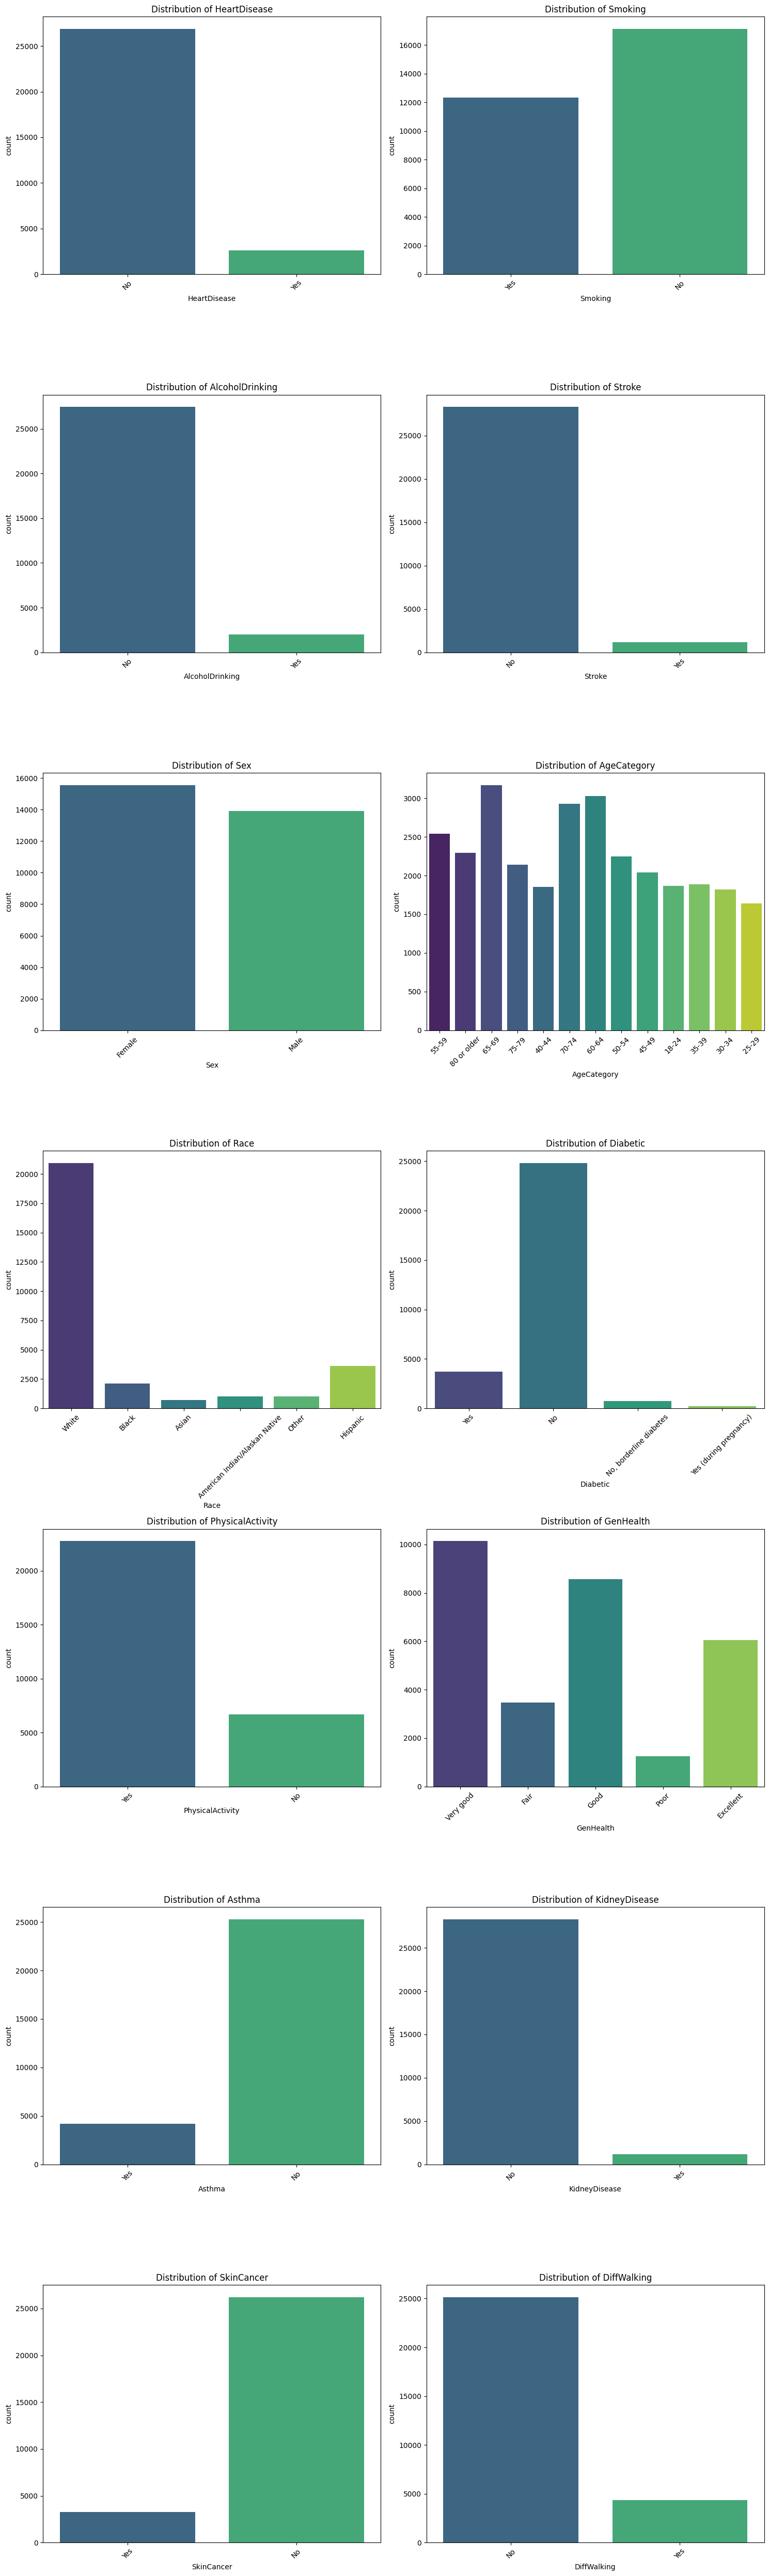

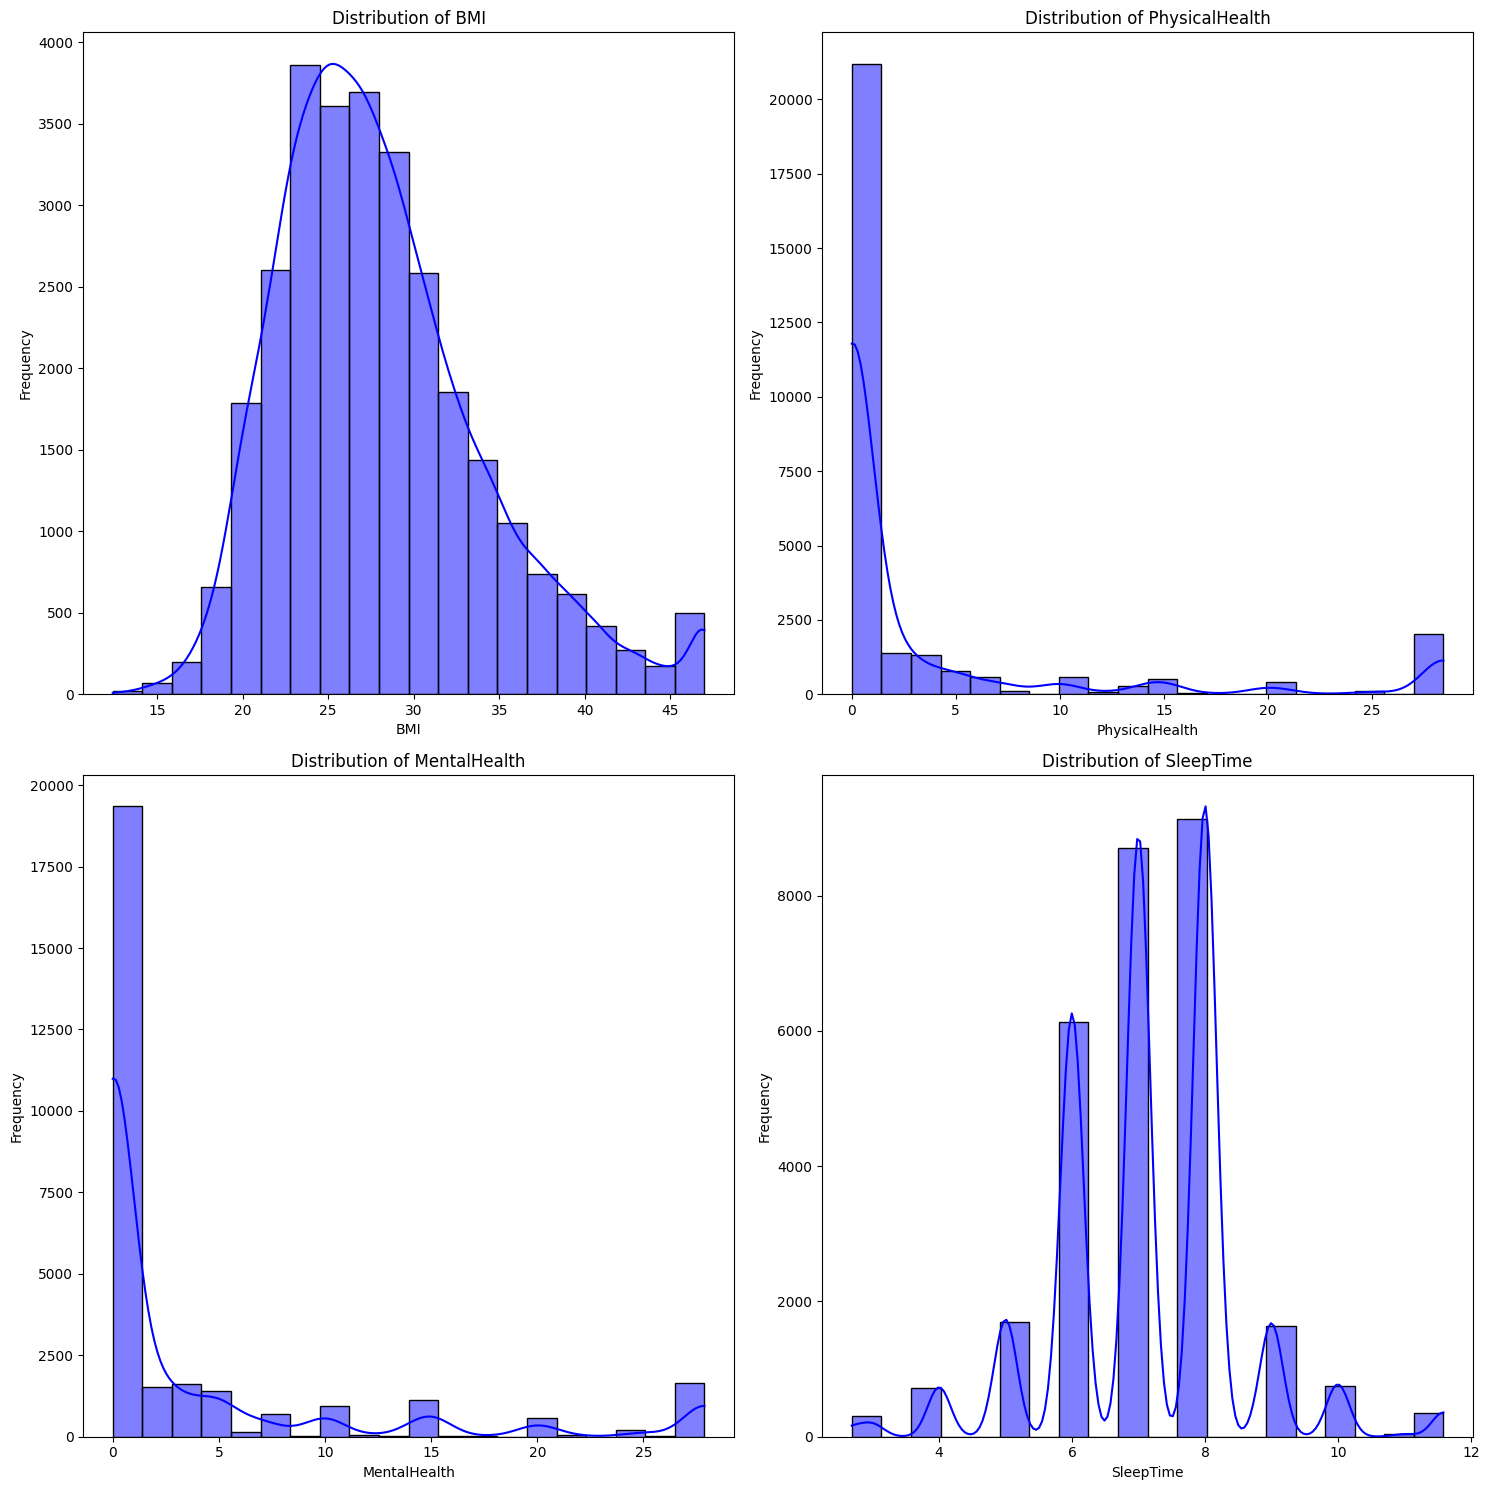

In [ ]:
# Univariate
import warnings
warnings.filterwarnings("ignore")

categorical_cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
                    'Sex', 'AgeCategory', 'Race', 'Diabetic',
                    'PhysicalActivity', 'GenHealth', 'Asthma',
                    'KidneyDisease', 'SkinCancer', 'DiffWalking']

numerical_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

plt.figure(figsize=(15, 50))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(7, 2, i)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  # Rotate x labels for better readability

plt.tight_layout()
plt.show()

# Univariate Analysis for Numerical Variables
plt.figure(figsize=(15, 15))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)  # Adjust the layout based on the number of numerical columns
    sns.histplot(df[col], bins=20, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

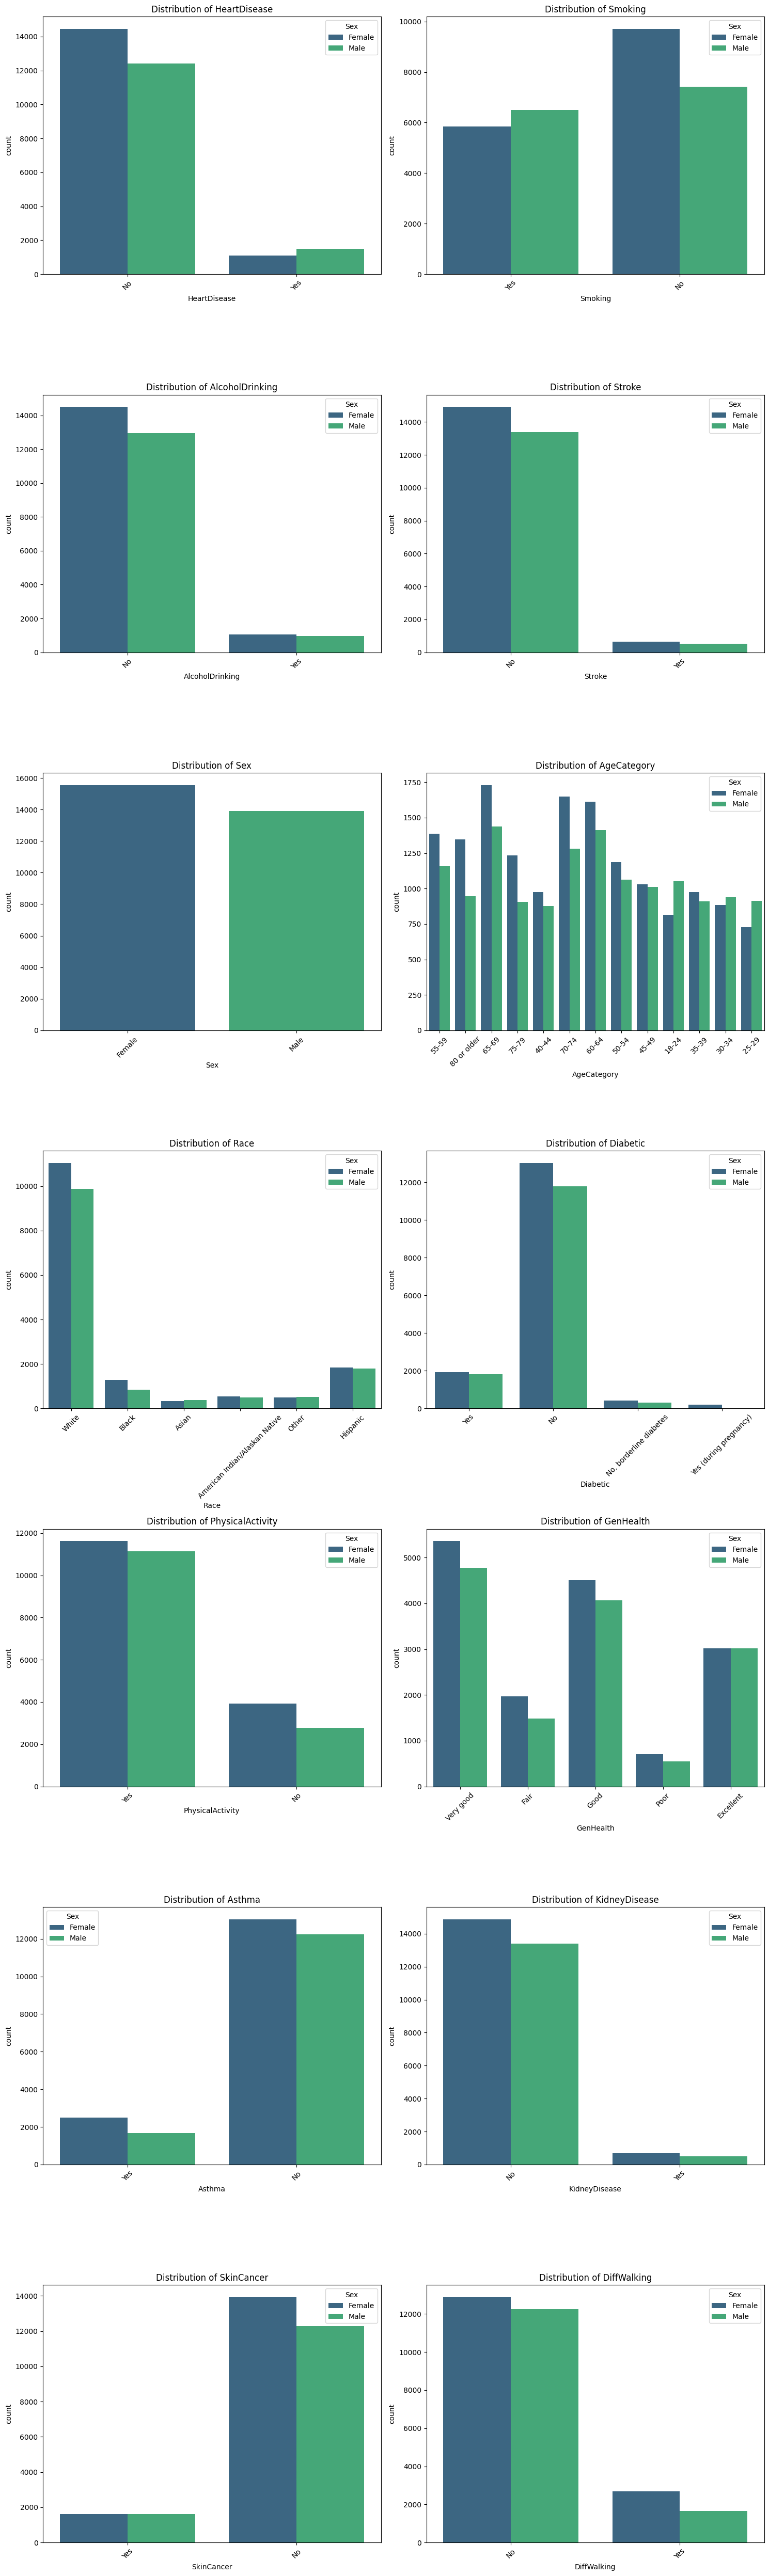

In [ ]:
categorical_cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
                    'Sex', 'AgeCategory', 'Race', 'Diabetic',
                    'PhysicalActivity', 'GenHealth', 'Asthma',
                    'KidneyDisease', 'SkinCancer', 'DiffWalking']

numerical_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

plt.figure(figsize=(15, 50))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(7, 2, i)
    sns.countplot(data=df, x=col, hue='Sex',palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  # Rotate x labels for better readability

plt.tight_layout()
plt.show()

In [ ]:
df

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0               No  16.60     Yes              No     No             3.0   
1               No  20.34      No              No    Yes             0.0   
2               No  26.58     Yes              No     No            20.0   
3               No  24.21      No              No     No             0.0   
4               No  23.71      No              No     No            28.0   
...            ...    ...     ...             ...    ...             ...   
29626           No  27.89      No              No     No             0.0   
29627           No  27.44      No              No     No             0.0   
29628           No  26.58      No              No     No             7.0   
29629           No  25.40      No              No     No             2.0   
29630           No  22.67      No              No     No             0.0   

       MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0         27.875389          No  Female        55-59     White      Yes   
1          0.000000          No  Female  80 or older     White       No   
2         27.875389          No    Male        65-69     White      Yes   
3          0.000000          No  Female        75-79     White       No   
4          0.000000         Yes  Female        40-44     White       No   
...             ...         ...     ...          ...       ...      ...   
29626      0.000000          No    Male        55-59     White       No   
29627      0.000000          No  Female        70-74     White       No   
29628      0.000000          No    Male        70-74     White       No   
29629      1.000000          No    Male        50-54  Hispanic       No   
29630      4.000000          No  Female        45-49     White       No   

      PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                  Yes  Very good        5.0    Yes            No        Yes  
1                  Yes  Very good        7.0     No            No         No  
2                  Yes       Fair        8.0    Yes            No         No  
3                   No       Good        6.0     No            No        Yes  
4                  Yes  Very good        8.0     No            No         No  
...                ...        ...        ...    ...           ...        ...  
29626              Yes  Excellent        7.0     No            No         No  
29627              Yes       Good        7.0     No            No         No  
29628              Yes  Very good        8.0     No            No        Yes  
29629              Yes  Very good        7.0     No            No         No  
29630              Yes  Very good        8.0     No            No         No  

[29458 rows x 18 columns]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['Sex', 'Smoking', 'AlcoholDrinking', 'Stroke', 'AgeCategory', 'Race', 'Diabetic',
                    'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer', 'DiffWalking']
numerical_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

plt.figure(figsize=(15, 400))

# Iterate over each combination of categorical and numerical columns
for j, cat_col in enumerate(categorical_cols):
    for i, num_col in enumerate(numerical_cols):
        plt.subplot(len(categorical_cols) * len(numerical_cols), 1, j * len(numerical_cols) + i + 1)
        sns.boxplot(data=df, x=cat_col, y=num_col, palette='coolwarm', hue='HeartDisease', dodge=True)
        plt.title(f'{num_col} by {cat_col} and Heart Disease')
        plt.xticks(rotation=45)
        plt.legend(title='HeartDisease')  # Set legend title to 'HeartDisease' for clarity

plt.tight_layout()
plt.show()


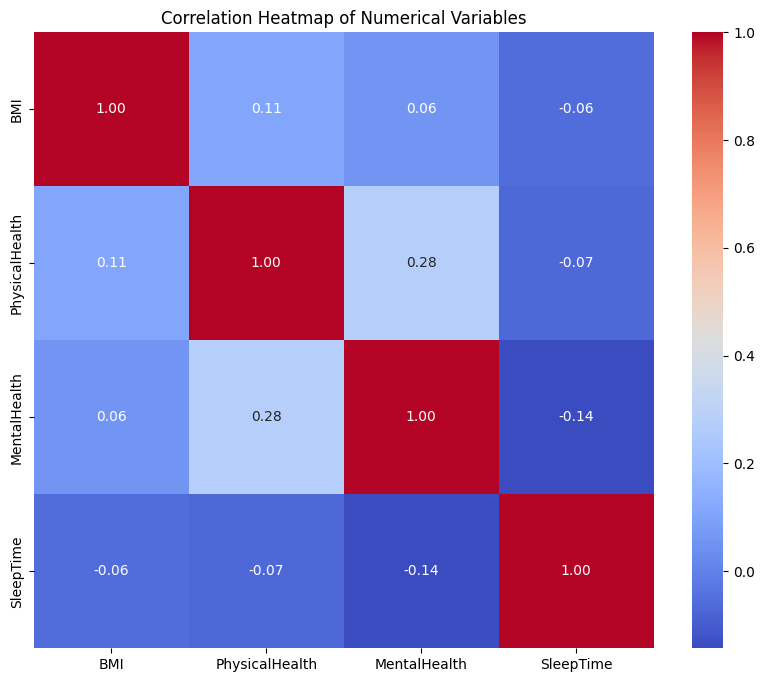

In [ ]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


In [ ]:
# Transform categorical data
for column in df.columns:
    if column == 'GenHealth':
        df[column] = df[column].replace({
            'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 4, 'Excellent': 5
        })
    elif column == 'AgeCategory':
        df[column] = df[column].replace({
            '18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4,
            '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9,
            '70-74': 10, '75-79': 11, '80 or older': 12
        })
    elif pd.api.types.is_object_dtype(df[column]) and column not in ['AgeCategory', 'GenHealth']:
        # Replace with appropriate mappings for each categorical column
        df[column] = df[column].replace({
            'White': 1, 'Black': 2, 'Asian': 3, 'American Indian/Alaskan Native': 4,
            'Other': 5, 'Hispanic': 6, 'No': 0, 'Yes': 1, 'No, borderline diabetes': 2,
            'Yes (during pregnancy)': 3, 'Male': 1, 'Female': 0
        })


In [ ]:
print("Data after processing categorical columns:")
df

Data after processing categorical columns:


HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                 0  16.60        1                0       0             3.0   
1                 0  20.34        0                0       1             0.0   
2                 0  26.58        1                0       0            20.0   
3                 0  24.21        0                0       0             0.0   
4                 0  23.71        0                0       0            28.0   
...             ...    ...      ...              ...     ...             ...   
29626             0  27.89        0                0       0             0.0   
29627             0  27.44        0                0       0             0.0   
29628             0  26.58        0                0       0             7.0   
29629             0  25.40        0                0       0             2.0   
29630             0  22.67        0                0       0             0.0   

       MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0         27.875389            0    0            7     1         1   
1          0.000000            0    0           12     1         0   
2         27.875389            0    1            9     1         1   
3          0.000000            0    0           11     1         0   
4          0.000000            1    0            4     1         0   
...             ...          ...  ...          ...   ...       ...   
29626      0.000000            0    1            7     1         0   
29627      0.000000            0    0           10     1         0   
29628      0.000000            0    1           10     1         0   
29629      1.000000            0    1            6     6         0   
29630      4.000000            0    0            5     1         0   

       PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
0                     1          4        5.0       1              0   
1                     1          4        7.0       0              0   
2                     1          1        8.0       1              0   
3                     0          2        6.0       0              0   
4                     1          4        8.0       0              0   
...                 ...        ...        ...     ...            ...   
29626                 1          5        7.0       0              0   
29627                 1          2        7.0       0              0   
29628                 1          4        8.0       0              0   
29629                 1          4        7.0       0              0   
29630                 1          4        8.0       0              0   

       SkinCancer  
0               1  
1               0  
2               0  
3               1  
4               0  
...           ...  
29626           0  
29627           0  
29628           1  
29629           0  
29630           0  

[29458 rows x 18 columns]

In [ ]:
# Calculate correlation matrix and identify correlated features
correlation_matrix = df.corr()
threshold = 0.8
correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Drop the correlated features
reduced_df = df.drop(columns=correlated_features)

# Display the results
print("Original DataFrame:\n", df)
print("\nCorrelated Features (to be removed):", correlated_features)
print("\nDataFrame after removing correlated features:\n", reduced_df)

Original DataFrame:
        HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                 0  16.60        1                0       0             3.0   
1                 0  20.34        0                0       1             0.0   
2                 0  26.58        1                0       0            20.0   
3                 0  24.21        0                0       0             0.0   
4                 0  23.71        0                0       0            28.0   
...             ...    ...      ...              ...     ...             ...   
29626             0  27.89        0                0       0             0.0   
29627             0  27.44        0                0       0             0.0   
29628             0  26.58        0                0       0             7.0   
29629             0  25.40        0                0       0             2.0   
29630             0  22.67        0                0       0             0.0   

       MentalHealt

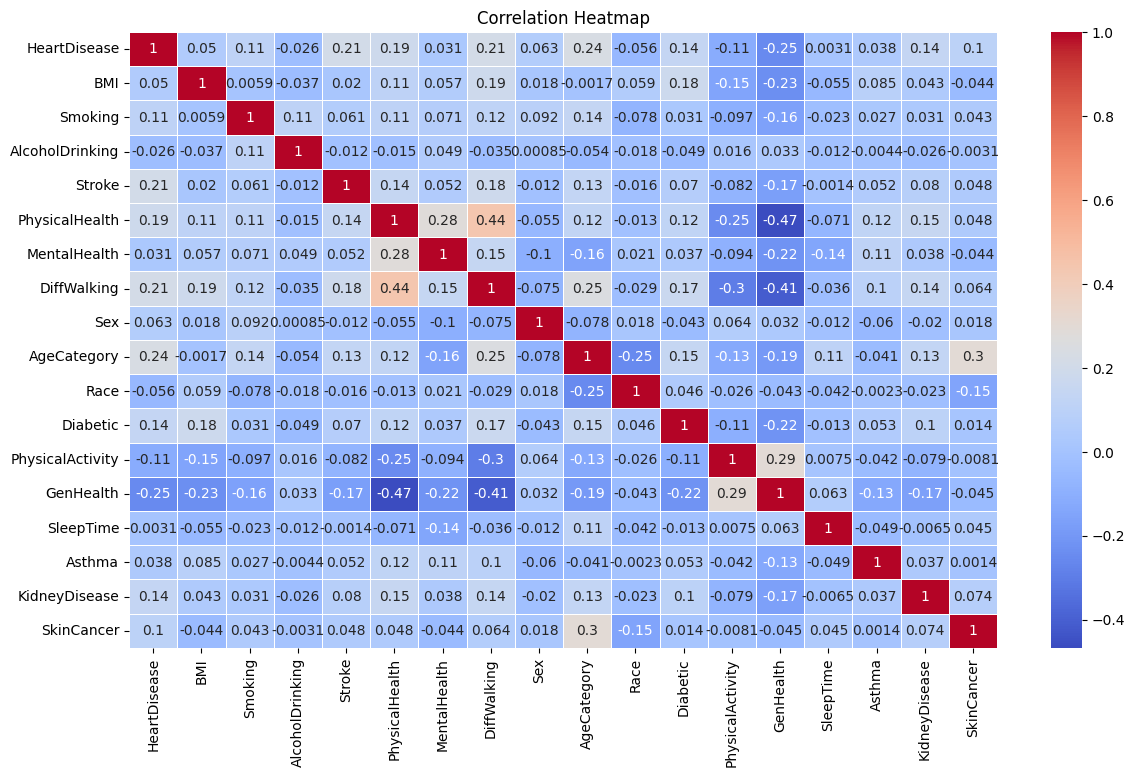

In [ ]:
import seaborn as sns
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df

HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                 0  16.60        1                0       0             3.0   
1                 0  20.34        0                0       1             0.0   
2                 0  26.58        1                0       0            20.0   
3                 0  24.21        0                0       0             0.0   
4                 0  23.71        0                0       0            28.0   
...             ...    ...      ...              ...     ...             ...   
29626             0  27.89        0                0       0             0.0   
29627             0  27.44        0                0       0             0.0   
29628             0  26.58        0                0       0             7.0   
29629             0  25.40        0                0       0             2.0   
29630             0  22.67        0                0       0             0.0   

       MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0         27.875389            0    0            7     1         1   
1          0.000000            0    0           12     1         0   
2         27.875389            0    1            9     1         1   
3          0.000000            0    0           11     1         0   
4          0.000000            1    0            4     1         0   
...             ...          ...  ...          ...   ...       ...   
29626      0.000000            0    1            7     1         0   
29627      0.000000            0    0           10     1         0   
29628      0.000000            0    1           10     1         0   
29629      1.000000            0    1            6     6         0   
29630      4.000000            0    0            5     1         0   

       PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  \
0                     1          4        5.0       1              0   
1                     1          4        7.0       0              0   
2                     1          1        8.0       1              0   
3                     0          2        6.0       0              0   
4                     1          4        8.0       0              0   
...                 ...        ...        ...     ...            ...   
29626                 1          5        7.0       0              0   
29627                 1          2        7.0       0              0   
29628                 1          4        8.0       0              0   
29629                 1          4        7.0       0              0   
29630                 1          4        8.0       0              0   

       SkinCancer  
0               1  
1               0  
2               0  
3               1  
4               0  
...           ...  
29626           0  
29627           0  
29628           1  
29629           0  
29630           0  

[29458 rows x 18 columns]

In [ ]:
# Min-Max Normalization (Manually)
numerical_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'AgeCategory', 'GenHealth', 'Race', 'Diabetic']

for column in numerical_cols:
    min_val = df[column].min()
    max_val = df[column].max()
    df[column] = (df[column] - min_val) / (max_val - min_val)



In [ ]:
df
df.to_csv('Normalized HeartDisease.csv', index=False)


In [ ]:
df

HeartDisease       BMI  Smoking  AlcoholDrinking  Stroke  \
0                 0  0.121404        1                0       0   
1                 0  0.229511        0                0       1   
2                 0  0.409882        1                0       0   
3                 0  0.341375        0                0       0   
4                 0  0.326922        0                0       0   
...             ...       ...      ...              ...     ...   
29626             0  0.447748        0                0       0   
29627             0  0.434740        0                0       0   
29628             0  0.409882        0                0       0   
29629             0  0.375773        0                0       0   
29630             0  0.296861        0                0       0   

       PhysicalHealth  MentalHealth  DiffWalking  Sex  AgeCategory  Race  \
0            0.105489      1.000000            0    0     0.583333   0.0   
1            0.000000      0.000000            0    0     1.000000   0.0   
2            0.703262      1.000000            0    1     0.750000   0.0   
3            0.000000      0.000000            0    0     0.916667   0.0   
4            0.984567      0.000000            1    0     0.333333   0.0   
...               ...           ...          ...  ...          ...   ...   
29626        0.000000      0.000000            0    1     0.583333   0.0   
29627        0.000000      0.000000            0    0     0.833333   0.0   
29628        0.246142      0.000000            0    1     0.833333   0.0   
29629        0.070326      0.035874            0    1     0.500000   1.0   
29630        0.000000      0.143496            0    0     0.416667   0.0   

       Diabetic  PhysicalActivity  GenHealth  SleepTime  Asthma  \
0      0.333333                 1        0.8   0.260005       1   
1      0.000000                 1        0.8   0.484621       0   
2      0.333333                 1        0.2   0.596928       1   
3      0.000000                 0        0.4   0.372313       0   
4      0.000000                 1        0.8   0.596928       0   
...         ...               ...        ...        ...     ...   
29626  0.000000                 1        1.0   0.484621       0   
29627  0.000000                 1        0.4   0.484621       0   
29628  0.000000                 1        0.8   0.596928       0   
29629  0.000000                 1        0.8   0.484621       0   
29630  0.000000                 1        0.8   0.596928       0   

       KidneyDisease  SkinCancer  
0                  0           1  
1                  0           0  
2                  0           0  
3                  0           1  
4                  0           0  
...              ...         ...  
29626              0           0  
29627              0           0  
29628              0           1  
29629              0           0  
29630              0           0  

[29458 rows x 18 columns]

In [ ]:

from sklearn.model_selection import train_test_split
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (23566, 17) (23566,)
Testing data shape: (5892, 17) (5892,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


In [ ]:
def evaluate_model(model_name, y_true, y_pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
    import matplotlib.pyplot as plt
    from io import BytesIO
    import base64

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)



    # Returning evaluation metrics
    return {
'Model': model_name,
'Accuracy': accuracy,
'Precision': precision,
'Recall': recall,
'F1 Score': f1,
'Confusion Matrix': cm.tolist(),


    }

# Evaluate models
results = []
results.append(evaluate_model('Logistic Regression', y_test, lr_predictions))
results.append(evaluate_model('Decision Tree', y_test, dt_predictions))
results.append(evaluate_model('Random Forest', y_test, rf_predictions))

# Print results
for result in results:
  for key, value in result.items():
    print(key, ":", value)
  print()

Model : Logistic Regression
Accuracy : 0.9081805838424983
Precision : 0.5
Recall : 0.09796672828096119
F1 Score : 0.16383307573415765
Confusion Matrix : [[5298, 53], [488, 53]]

Model : Decision Tree
Accuracy : 0.8521724372029871
Precision : 0.22033898305084745
Recall : 0.24029574861367836
F1 Score : 0.22988505747126436
Confusion Matrix : [[4891, 460], [411, 130]]

Model : Random Forest
Accuracy : 0.9037678207739308
Precision : 0.38596491228070173
Recall : 0.08133086876155268
F1 Score : 0.13435114503816795
Confusion Matrix : [[5281, 70], [497, 44]]



In [ ]:
results_df = pd.DataFrame(results)
print(results_df)
def print_results(results):
    for result in results:
        print("\n" + "="*50)
        print(f"Model: {result['Model']}")
        print("="*50)
        print(f"Accuracy         : {result['Accuracy']:.2f}")
        print(f"Precision        : {result['Precision']:.2f}")
        print(f"Recall           : {result['Recall']:.2f}")
        print(f"F1 Score         : {result['F1 Score']:.2f}")
        print(f"Confusion Matrix :\n{result['Confusion Matrix']}")
        print("="*50)
print_results(results)

                 Model  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression  0.908181   0.500000  0.097967  0.163833   
1        Decision Tree  0.852172   0.220339  0.240296  0.229885   
2        Random Forest  0.903768   0.385965  0.081331  0.134351   

            Confusion Matrix  
0    [[5298, 53], [488, 53]]  
1  [[4891, 460], [411, 130]]  
2    [[5281, 70], [497, 44]]  

Model: Logistic Regression
Accuracy         : 0.91
Precision        : 0.50
Recall           : 0.10
F1 Score         : 0.16
Confusion Matrix :
[[5298, 53], [488, 53]]

Model: Decision Tree
Accuracy         : 0.85
Precision        : 0.22
Recall           : 0.24
F1 Score         : 0.23
Confusion Matrix :
[[4891, 460], [411, 130]]

Model: Random Forest
Accuracy         : 0.90
Precision        : 0.39
Recall           : 0.08
F1 Score         : 0.13
Confusion Matrix :
[[5281, 70], [497, 44]]


In [ ]:
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000, class_weight='balanced'), param_grid_lr),
    'Decision Tree': (DecisionTreeClassifier(class_weight='balanced'), param_grid_dt),
    'Random Forest': (RandomForestClassifier(class_weight='balanced'), param_grid_rf)
}

results = []
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    results.append({
        'Model': model_name,
        'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
    print(f"Finished hyperparameter tuning for {model_name}")

results_df = pd.DataFrame(results)
print(results_df)


Finished hyperparameter tuning for Logistic Regression
Finished hyperparameter tuning for Decision Tree
Finished hyperparameter tuning for Random Forest
                 Model                                    Best Parameters  \
0  Logistic Regression   {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}   
1        Decision Tree  {'max_depth': 10, 'min_samples_leaf': 4, 'min_...   
2        Random Forest  {'max_depth': 10, 'min_samples_leaf': 2, 'min_...   

   Accuracy  Precision    Recall  F1 Score  
0  0.744060   0.236799  0.804067  0.365854  
1  0.741684   0.219554  0.709797  0.335371  
2  0.786490   0.255624  0.693161  0.373506  


In [ ]:
q=df[0:109793]
y=q['HeartDisease']
q=q.drop('HeartDisease', axis=1)

In [ ]:
lr_predictions = lr_model.predict(q)
print(lr_predictions)
print(y)

[0 0 0 ... 0 0 0]
0        0
1        0
2        0
3        0
4        0
        ..
29626    0
29627    0
29628    0
29629    0
29630    0
Name: HeartDisease, Length: 29458, dtype: int64
